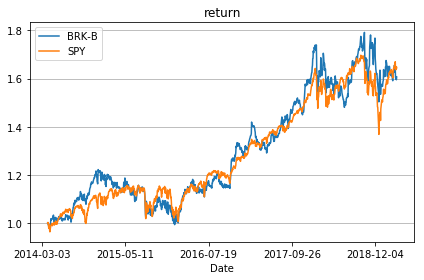

In [3]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

#------------------------------
#-- 0. Read in 
#------------------------------
df = pd.read_csv('M03 BRK-B SPY.csv')

#----------------------------------------
#-- 1. calc return1, pivot AID to columns
#----------------------------------------
df['return1'] = df['mv']/df['cost']
pivoted = df.pivot(index='Date', columns='AID', values='return1')

flattened = pd.DataFrame(pivoted.to_records())
cols = flattened.columns.values.tolist() 
cols.remove('Date')

#-------------------------------------------------
#-- 2. plot return1 
#-------------------------------------------------
def get_chart(df, cols):
    
    x1 = df['Date']
    y1 = df[cols]

    fig, ax1 = plt.subplots()

    #-- plot
    ax1.plot(x1, y1) # 

    #-- x1(date)
    plt.xticks(x1) # x1(Date)
    ax1.set_xlabel('Date')

    #-- set max xaxis n ticks
    ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
    
    #-- plot title
    plt.title('return')
    
    #-- plot legend
    plt.legend(cols)
    
    #-- horizontal grid
    ax1.yaxis.grid(True)

    #-- plot tight_layout, show
    plt.tight_layout()
    plt.show()
    
get_chart(df=flattened, cols=cols)


#------------------------------
#-- 3. Output to csv
#------------------------------
# Key: Date
flattened.to_csv('V03 BRK-B SPY.csv',index=False) 

In [2]:
flattened.tail()

,Date,BRK-B,SPY
1273,2019-03-22,1.605942,1.637915
1274,2019-03-25,1.597053,1.636683
1275,2019-03-26,1.606502,1.648883
1276,2019-03-27,1.595211,1.640261
1277,2019-03-28,1.606823,1.646478
